In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

# 1. Early measures

## A. First comparisons

In [2]:
rpidf = pd.read_csv('../saved_results/pi/pi2.csv') 
frododf_1= pd.read_csv('../saved_results/frodo/frodo2.csv')  #1 GPU
frododf_3 = pd.read_csv('../saved_results/frodo/frodo3.csv') #2 GPU 
mac_df = pd.read_csv('../saved_results/mac/mac2.csv')

frodo_avg = pd.read_csv('../saved_results/frodo/f_averages.csv')

In [3]:
neurons = []
pi_times = []
frodo_times_1 = []
frodo_times_3 = []
mac_times = []
frod_times_avg = []

for i in rpidf.values.tolist():
    neurons.append(i[0])
    pi_times.append(i[1])
for i in frododf_1.values.tolist():
        frodo_times_1.append(i[1])
for i in frododf_3.values.tolist():
        frodo_times_3.append(i[1])
for i in mac_df.values.tolist():
        mac_times.append(i[1])
for i in frodo_avg.values.tolist():
        frod_times_avg.append(i[2])

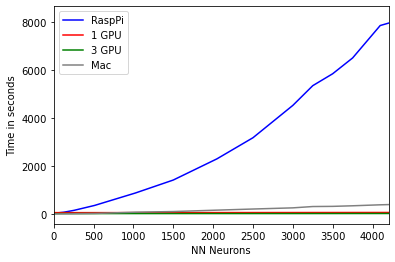

In [4]:
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'gray', label='Mac')
#plt.plot(neurons, frod_times_avg, label='average')
plt.legend()
plt.savefig('../saved_results/figures/raw_comparison.png')
img = plt.show()

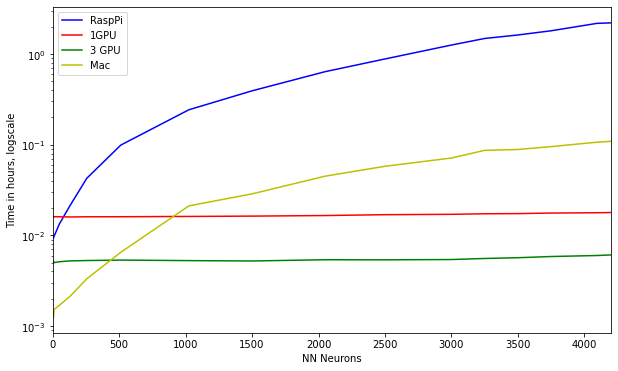

In [5]:
pi_timesh = [t/3600 for t in pi_times]
frodo_times_1h = [t/3600 for t in frodo_times_1]
frodo_times_3h = [t/3600 for t in frodo_times_3]
mac_timesh = [t/3600 for t in mac_times]

plt.figure(figsize=(10,6))
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in hours, logscale')
plt.yscale('log')
plt.plot(neurons, pi_timesh, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1h, 'r', label='1GPU')
plt.plot(neurons, frodo_times_3h, 'g', label='3 GPU')
plt.plot(neurons, mac_timesh, 'y', label='Mac')
plt.legend()
plt.savefig('../saved_results/figures/raw_comparison_hours.png')
plt.show()


In [6]:
## Zoom in

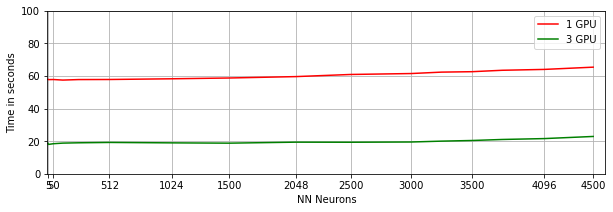

In [7]:
ticks = [5,50,512,1024,1500,2048,2500,3000,3500,4096,4500]

plt.figure(figsize=(10,3))
plt.xlim(0,4600)
plt.ylim(0,100)
plt.xticks(ticks)
plt.grid(True)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
#plt.plot(neurons, pi_times, 'b')
#plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.legend()
plt.savefig('../saved_results/figures/gpu1v3.png', bbox_inches='tight')
plt.show()

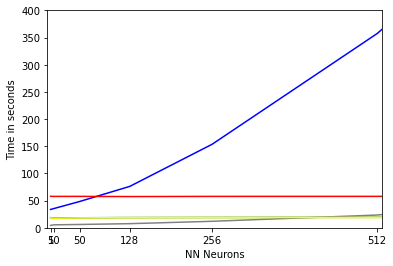

In [8]:
plt.xticks(neurons)
plt.xlim(0,520)
plt.ylim(0,400)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')

plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.plot(neurons, frod_times_avg, 'yellow' ,label='average')
plt.show()

## B. Frodo average over 10 runs 

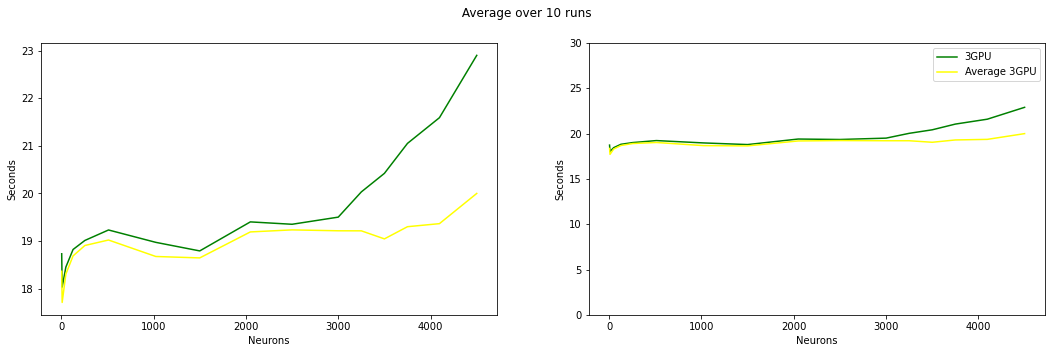

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
fig.suptitle(' Average over 10 runs ')
ax1.set(xlabel='Neurons', ylabel='Seconds')
ax1.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax1.plot(neurons, frod_times_avg, 'yellow' ,label='Average')

ax2.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax2.plot(neurons, frod_times_avg, 'yellow' ,label='Average 3GPU')
ax2.set_ylim(0,30)
ax2.set(xlabel='Neurons', ylabel='Seconds')
plt.legend()

# DELETED
#plt.savefig('../saved_results/figures/gpu_comp.png', bbox_inches='tight')
plt.show()

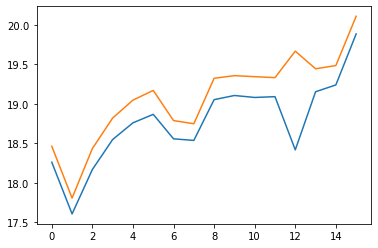

In [10]:
import numpy as np

# loading the 10 csvs into a list of dataframes
dfs = []
for i in range(10):
    dfs.append(pd.read_csv('../saved_results/frodo/' + str(i+1) + '.csv')) 

# dict containing the 16 times (values) for the 10 measurements (keys)
times = {}
for j in range(10):
    times[j] = []
    for i in dfs[j].values.tolist():
        times[j].append(i[1])

#print(times[0])

# std part 
stds = []
timesarray = []
timesdic = {}
for j in range(16):
    timesdic[j] = []
    for i in range(10):
        timesdic[j].append(times[i][j])
    #print(timesdic[j])
    stds.append(np.std(np.asarray(timesdic[j])))

min = np.asarray(frod_times_avg)-np.asarray(stds)
max = np.asarray(frod_times_avg)+np.asarray(stds)
plt.plot(min)
plt.plot(max)
plt.show()

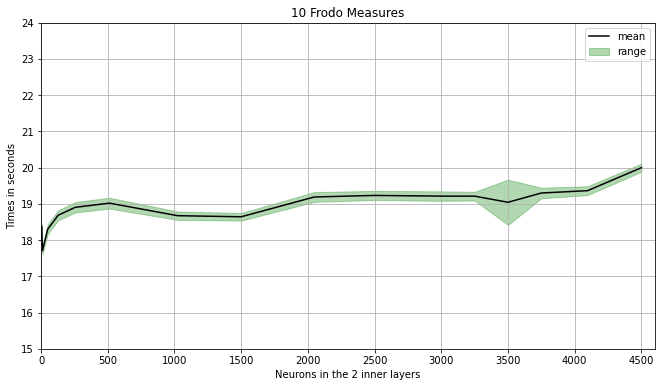

In [11]:
# Comparing the 10 measures used for the 'average'
plt.figure(figsize=(11,6))
plt.title('10 Frodo Measures')
min = np.asarray(frod_times_avg)-np.asarray(stds) 
max = np.asarray(frod_times_avg)+np.asarray(stds)


plt.ylim(15,24)
plt.ylabel('Times in seconds')
plt.xlim(-1,4600)
plt.xlabel('Neurons in the 2 inner layers')
plt.grid(True)
plt.xticks([i for i in range(0,5000,500)])
plt.plot(neurons, frod_times_avg, color='black', label='mean')
plt.fill_between(neurons,min.tolist(),max.tolist(),alpha=.3, color='green', label='range')
plt.legend()

plt.savefig('../saved_results/figures/10measures.png', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


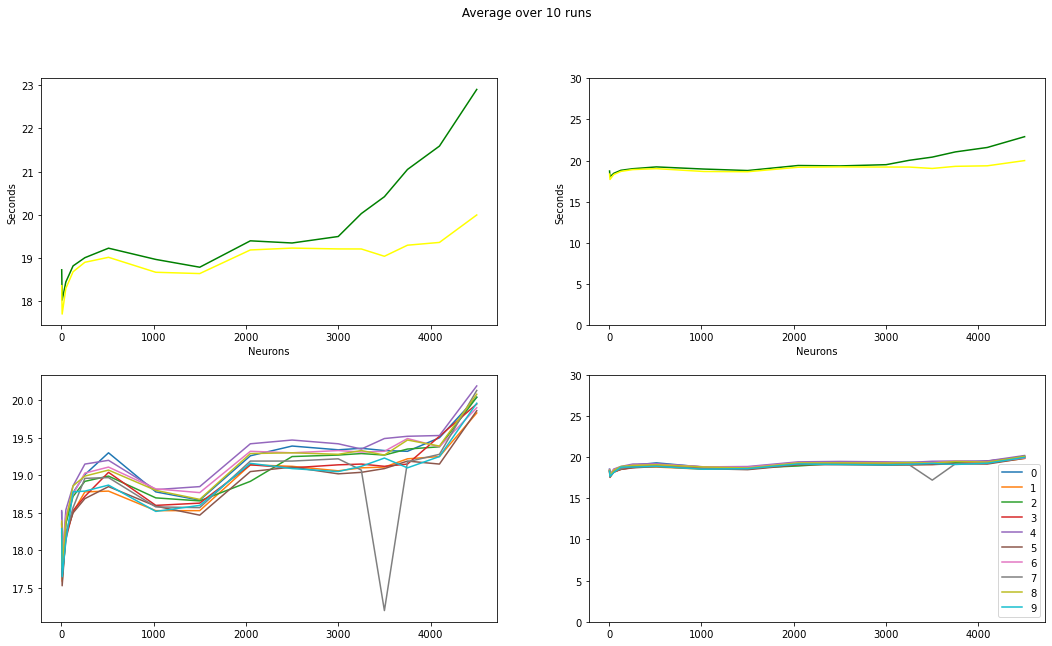

In [12]:
# Combination 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))
fig.suptitle(' Average over 10 runs ')
ax1.set(xlabel='Neurons', ylabel='Seconds')
ax1.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax1.plot(neurons, frod_times_avg, 'yellow' ,label='Average')

ax2.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax2.plot(neurons, frod_times_avg, 'yellow' ,label='Average 3GPU')
ax2.set_ylim(0,30)
ax2.set(xlabel='Neurons', ylabel='Seconds')
plt.legend()


#ax3.title('10 Frodo Measures')
for i in range(10):
    ax3.plot(neurons, times[i], label=i)
plt.legend()

ax4.set_ylim(0,30)
#ax4.title('10 Frodo Measures')
for i in range(10):
    ax4.plot(neurons, times[i], label=i)
plt.legend()


plt.savefig('../saved_results/figures/average_comp.png', bbox_inches='tight')
plt.show()

In [13]:
def plot(fig):
    fig.plot(neurons, pi_times, 'b', label = 'RaspPi')
    fig.plot(neurons, frodo_times_1, 'r', label = '1 GPU')
    fig.plot(neurons, frodo_times_3, 'g', label = '3 GPU')
    fig.plot(neurons, mac_times, 'gray', label='Mac')
    fig.legend()


## C. Different zooms

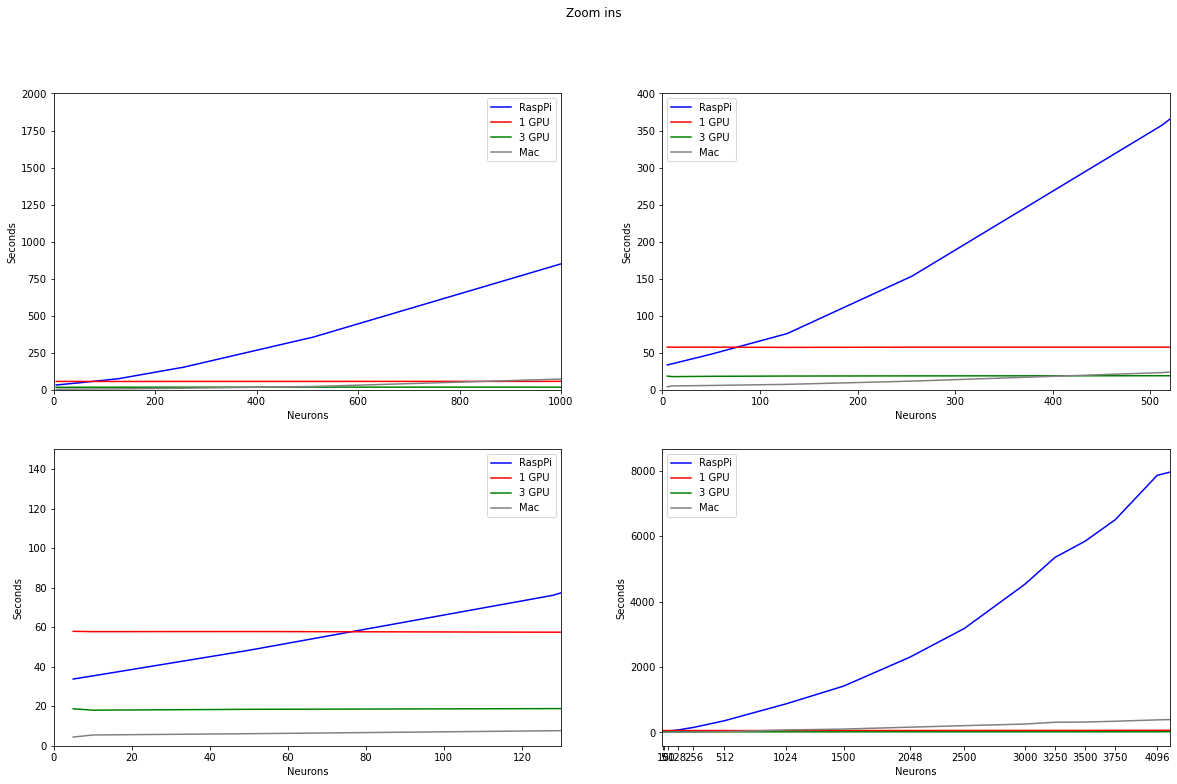

In [14]:
fig, axs = plt.subplots(2,2 , figsize=(20,12))
fig.suptitle('Zoom ins')
axs[0,0].set_xlim(0,1000)
axs[0,0].set_ylim(0,2000)

plot(axs[0,0])

plt.xticks(neurons)
axs[0,1].set_xlim(0,520)
axs[0,1].set_ylim(0,400)
#axs[0,1].set_xticks(neurons)
plot(axs[0,1])


axs[1,0].set_xlim(0,130)
axs[1,0].set_ylim(0,150)
plot(axs[1,0])

axs[1,1].set_xlim(0,4200)
plot(axs[1,1])

for ax in axs.flat:
    ax.set(xlabel='Neurons', ylabel='Seconds')

plt.savefig('../saved_results/figures/subplots_zoom.png', bbox_inches='tight', pad_inches = 1)
plt.show()


# 2. Batch3
Batch2 is a set of 3 runs on frodo with the running setup :   
mnist_rpi6.py -n 5,10,50,128,256,512,1024,1500,2048,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000 -l 2,4,6,8 

Training set is mnist, with 10 epochs and batch_size = 128

In [15]:
one = pd.read_csv('../saved_results/frodo/batch2_1.csv')
two = pd.read_csv('../saved_results/frodo/batch2_2.csv')
three = pd.read_csv('../saved_results/frodo/batch2_3.csv')

In [16]:
batch2_neurons = []
for i in one.values.tolist()[::4]:
        batch2_neurons.append(i[0])

# layers 2,4,6,8 == keys 1,2,3,4
dict1 = {'1':[], '2':[], '3':[], '4':[]}
dict2 = {'1':[], '2':[], '3':[], '4':[]}
dict3 = {'1':[], '2':[], '3':[], '4':[]}
for j in range(1,5):
    for i in one.values.tolist()[(j-1)::4]:
        dict1[str(j)].append(i[2])
    for i in two.values.tolist()[(j-1)::4]:
        dict2[str(j)].append(i[2])
    for i in three.values.tolist()[(j-1)::4]:
        dict3[str(j)].append(i[2])
    


### A. First plots

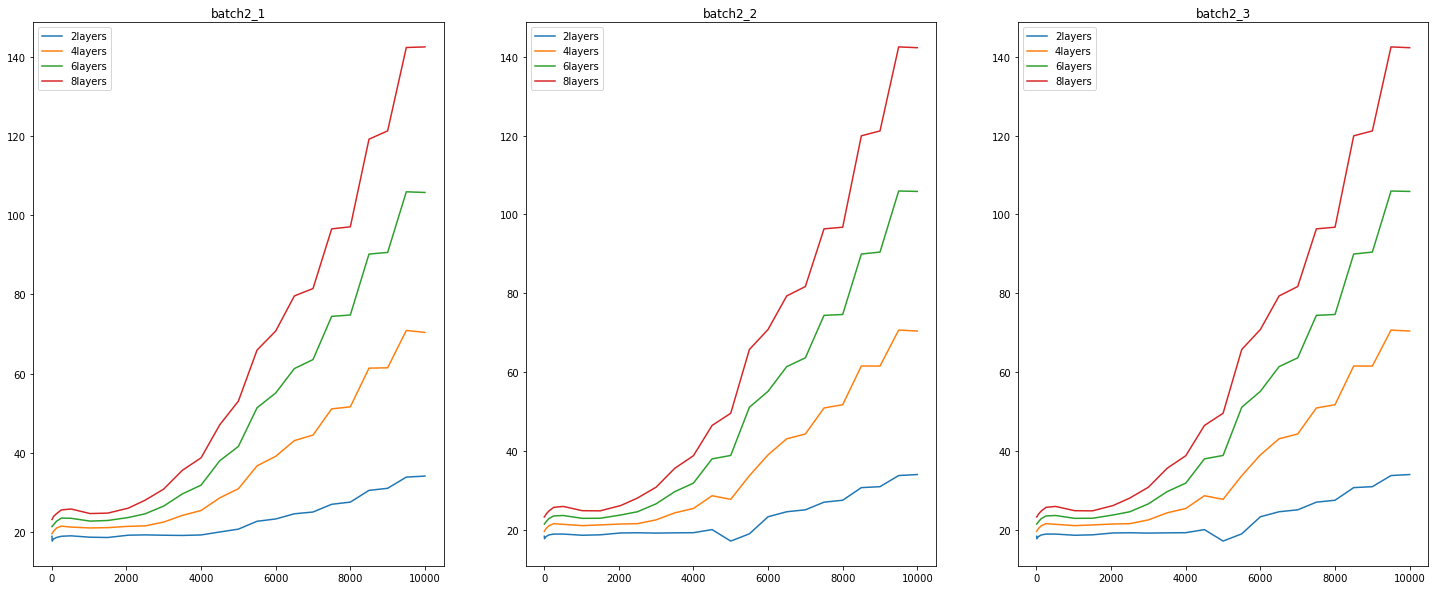

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))

for i in range(1,5):
    ax1.plot(batch2_neurons, dict1[str(i)], label=str(2*i) + 'layers')
ax1.title.set_text('batch2_1')
ax1.legend()
for i in range(1,5):
    ax2.plot(batch2_neurons, dict2[str(i)], label=str(2*i) + 'layers')
ax2.title.set_text('batch2_2')
ax2.legend()
for i in range(1,5):
    ax3.plot(batch2_neurons, dict2[str(i)], label=str(2*i) + 'layers')
ax3.title.set_text('batch2_3')
ax3.legend()

plt.show()

### B. All together 

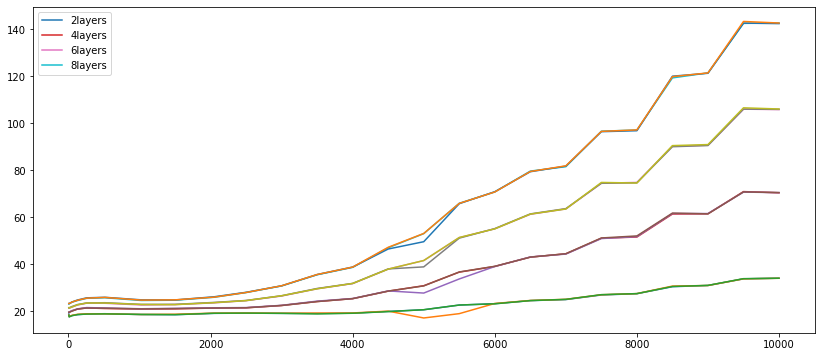

In [18]:
dict1['4']

plt.figure(figsize=(14,6))
for i in range(1,5):
    plt.plot(batch2_neurons, dict1[str(i)], label=str(2*i) + 'layers')
    plt.plot(batch2_neurons, dict2[str(i)])#, label=str(2*i) + 'layers')
    plt.plot(batch2_neurons, dict3[str(i)])#, label=str(2*i) + 'layers')
plt.legend()
plt.show()

### C. With the previous (shorter) frodo run

In [19]:
neur_fix2 = [x for x in neurons if x!= 3250.0]
neur_fix2 = [x for x in neur_fix2 if x!= 3750.0]
#neur_fix2

[18.362,
 17.707,
 18.302,
 18.685,
 18.904,
 19.019,
 18.673,
 18.643,
 19.189,
 19.232,
 19.213,
 19.212,
 19.043,
 19.299,
 19.363,
 19.998]

In [20]:
del frod_times_avg[11]
del frod_times_avg[-1]
len(frod_times_avg)

14

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


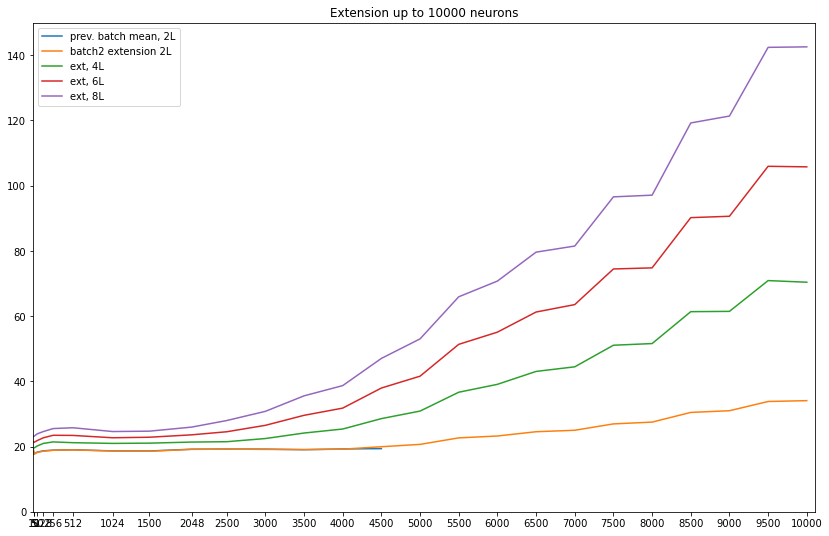

In [21]:
plt.figure(figsize=(14,9))
plt.title('Extension up to 10000 neurons')
plt.xlim(0,10100)
plt.ylim(0,150)
plt.xticks(batch2_neurons)
plt.plot(neur_fix2, frod_times_avg, label='prev. batch mean, 2L')
plt.plot(batch2_neurons, dict1['1'], label='batch2 extension 2L')
plt.plot(batch2_neurons, dict1['2'], label='ext, 4L')
plt.plot(batch2_neurons, dict1['3'], label='ext, 6L')
plt.plot(batch2_neurons, dict1['4'], label='ext, 8L')
plt.legend()
plt.savefig('../saved_results/figures/plot_extension.eps', bbox_inches='tight', pad_inches = 1)
plt.show()

In [37]:
print(frod_times_avg[15])
print(dict1['1'][15])

19.998
22.66


In [50]:
## Average of the 3 batch2 sets for 2layers : 
avg_batch2_2layers = []
for i in range(len(dict1['1'])):
    avg_batch2_2layers.append((dict1['1'][i] + dict2['1'][i] + dict3['1'][i])/3)
avg_batch2_2layers

[18.53,
 17.69666666666667,
 18.216666666666665,
 18.64333333333333,
 18.883333333333333,
 18.95,
 18.653333333333332,
 18.636666666666667,
 19.180000000000003,
 19.243333333333336,
 19.156666666666666,
 19.080000000000002,
 19.226666666666667,
 19.97,
 19.506666666666668,
 21.44666666666667,
 23.256666666666664,
 24.573333333333334,
 25.060000000000002,
 27.026666666666667,
 27.516666666666666,
 30.58666666666667,
 30.99333333333333,
 33.830000000000005,
 34.06333333333333]

# 3: batch3

Batch2 is a set of 3 runs on frodo with the same running setups as batch2, only the training data set is different : fashion mnist

In [24]:
batch3_1 = pd.read_csv('../saved_results/frodo/batch3_1.csv')
batch3_2 = pd.read_csv('../saved_results/frodo/batch3_2.csv')
batch3_3 = pd.read_csv('../saved_results/frodo/batch3_3.csv')

batch3_neurons = [] # == batch2_neurons
for i in one.values.tolist()[::4]:
        batch3_neurons.append(i[0])

# layers 2,4,6,8 == keys 1,2,3,4
bict1 = {'1':[], '2':[], '3':[], '4':[]}
bict2 = {'1':[], '2':[], '3':[], '4':[]}
bict3 = {'1':[], '2':[], '3':[], '4':[]}
for j in range(1,5):
    for i in batch3_1.values.tolist()[(j-1)::4]:
        bict1[str(j)].append(i[2])
    for i in batch3_2.values.tolist()[(j-1)::4]:
        bict2[str(j)].append(i[2])
    for i in batch3_3.values.tolist()[(j-1)::4]:
        bict3[str(j)].append(i[2])
    


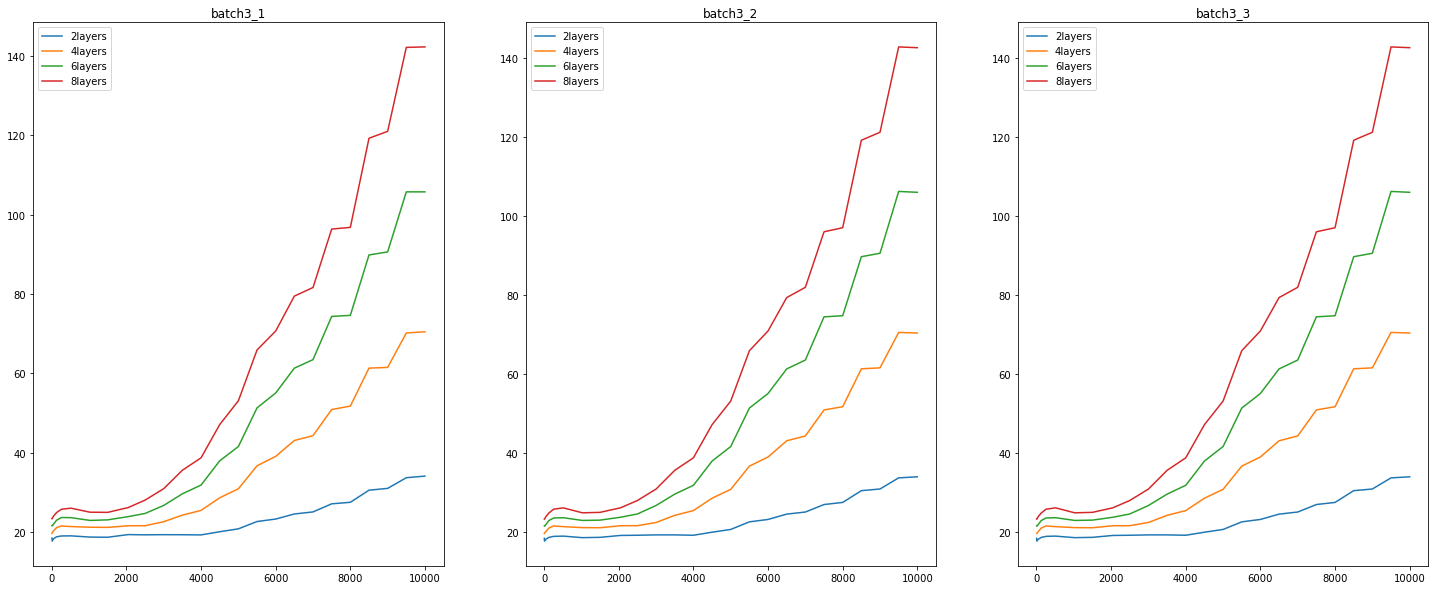

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))

for i in range(1,5):
    ax1.plot(batch3_neurons, bict1[str(i)], label=str(2*i) + 'layers')
ax1.title.set_text('batch3_1')
ax1.legend()
for i in range(1,5):
    ax2.plot(batch3_neurons, bict2[str(i)], label=str(2*i) + 'layers')
ax2.title.set_text('batch3_2')
ax2.legend()
for i in range(1,5):
    ax3.plot(batch3_neurons, bict2[str(i)], label=str(2*i) + 'layers')
ax3.title.set_text('batch3_3')
ax3.legend()

plt.show()

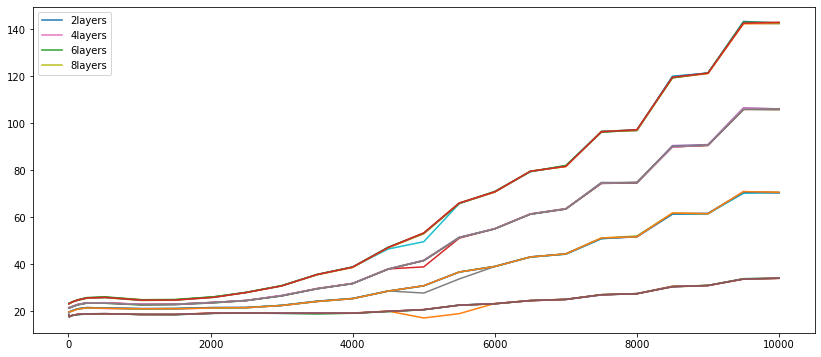

In [26]:
plt.figure(figsize=(14,6))
for i in range(1,5):
    plt.plot(batch2_neurons, dict1[str(i)], label=str(2*i) + 'layers')
    plt.plot(batch2_neurons, dict2[str(i)])#, label=str(2*i) + 'layers')
    plt.plot(batch2_neurons, dict3[str(i)])#, label=str(2*i) + 'layers')
    plt.plot(batch3_neurons, bict1[str(i)])
    plt.plot(batch3_neurons, bict2[str(i)])
    plt.plot(batch3_neurons, bict3[str(i)])
plt.legend()
plt.show()

In [27]:
print(bict1['1'])
print(bict2['1'])
print(bict3['1'])

[18.41, 17.66, 18.27, 18.74, 18.95, 18.98, 18.67, 18.63, 19.3, 19.24, 19.28, 19.26, 19.22, 20.02, 20.75, 22.6, 23.22, 24.5, 25.02, 27.06, 27.45, 30.5, 30.96, 33.65, 34.06]
[18.46, 17.76, 18.25, 18.69, 18.96, 19.02, 18.63, 18.71, 19.19, 19.24, 19.33, 19.33, 19.24, 20.01, 20.71, 22.63, 23.24, 24.59, 25.12, 27.02, 27.55, 30.53, 30.95, 33.77, 34.04]
[18.42, 17.67, 18.23, 18.7, 18.89, 19.03, 18.66, 18.68, 19.15, 19.28, 19.22, 19.23, 19.17, 20.0, 20.7, 22.58, 23.19, 24.59, 25.11, 27.07, 27.48, 30.38, 30.97, 33.71, 34.0]


In [31]:
frod_times_avg

[18.362,
 17.707,
 18.302,
 18.685,
 18.904,
 19.019,
 18.673,
 18.643,
 19.189,
 19.232,
 19.213,
 19.212,
 19.043,
 19.299,
 19.363,
 19.998]

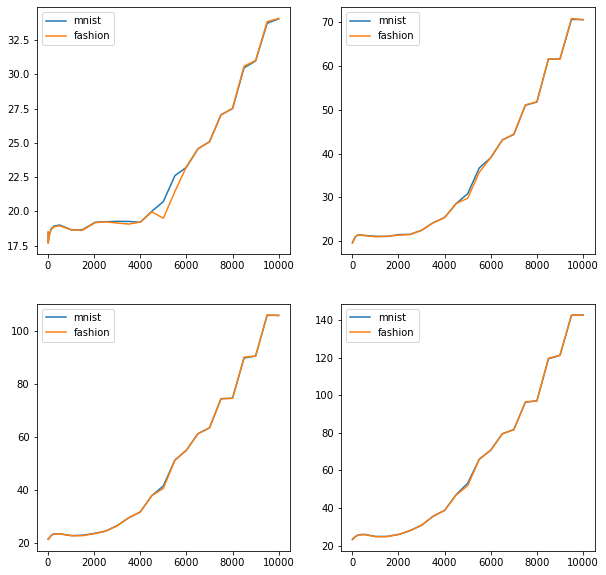

In [57]:
# Processing the averages of the 3 runs for the 4different amount of layers : 
# for the batch_3
bic_avg = {'1':[], '2':[], '3':[], '4':[]}
for i in range(len(bict1['1'])):
    bic_avg['1'].append((bict1['1'][i]+bict2['1'][i]+bict3['1'][i])/3)
    bic_avg['2'].append((bict1['2'][i]+bict2['2'][i]+bict3['2'][i])/3)
    bic_avg['3'].append((bict1['3'][i]+bict2['3'][i]+bict3['3'][i])/3)
    bic_avg['4'].append((bict1['4'][i]+bict2['4'][i]+bict3['4'][i])/3)

# for the batch_2, I didn't have these averages yet
dic_avg = {'1':[], '2':[], '3':[], '4':[]}
for i in range(len(dict1['1'])):
    dic_avg['1'].append((dict1['1'][i]+dict2['1'][i]+dict3['1'][i])/3)
    dic_avg['2'].append((dict1['2'][i]+dict2['2'][i]+dict3['2'][i])/3)
    dic_avg['3'].append((dict1['3'][i]+dict2['3'][i]+dict3['3'][i])/3)
    dic_avg['4'].append((dict1['4'][i]+dict2['4'][i]+dict3['4'][i])/3)

fig = plt.figure(figsize=(10,10))
for i in range(4):
    ax = fig.add_subplot(221 + i)
    plt.plot(batch2_neurons, bic_avg[str(i+1)], label = 'mnist')
    plt.plot(batch2_neurons, dic_avg[str(i+1)], label = 'fashion')
    plt.legend()


The results are very similar, but this is also certainly due to the fact that the network used is the same, and the size of all the images is exactly the same too.

# 4: Batch4

# 5: Batch sizes comparisons

In [28]:
df_batches = []
for i in range(11):
    df_batches.append(pd.read_csv('../saved_results/mac/batch_comp' + str(i) + '.csv')) 

# Was not saved in the svs
batches_size = []
for i in range(11):
    batches_size.append(2**i)
batches_size

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [15]:
df_batches[0]

,Neurons,Layers,Training time,Inference time,By image,Loss,Acc
0,128,2,43.24,0.27,0.0,0.01,0.92
1,256,2,60.98,0.29,0.0,0.01,0.92


In [27]:
# Training times from 1
training_times = []
accuracies = []
for df in df_batches:
    training_times.append(df.loc[0][2])
    accuracies.append(df.loc[0][6])


In [29]:
training_times

[43.24, 24.2, 14.16, 9.62, 4.38, 3.09, 2.0, 1.7, 1.32, 1.05, 0.98]

In [30]:
accuracies

[0.92, 0.9, 0.87, 0.75, 0.44, 0.29, 0.22, 0.16, 0.12, 0.1, 0.11]